In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from gtfparse import read_gtf
from matplotlib_venn import venn2, venn2_circles
import bioframe
import warnings
warnings.filterwarnings('ignore')

### Motifs enrichment in ZFP143 peaks

In [2]:
enrichment_zfp143 = pd.read_csv('./annotations/zfp143_peaks_zfp143_motifs_enrichment.csv')
enrichment_zfp143['fold_enrichment'] = enrichment_zfp143['V2']/enrichment_zfp143['V3']
enrichment_zfp143 = enrichment_zfp143.drop(['V2', 'V3', 'V4'], axis = 1)
enrichment_zfp143.columns = ['Motif_name', 'Fold_enrichment']
enrichment_zfp143['Motif_ID'] = ['SBS1', 'SBS2']
enrichment_zfp143 = enrichment_zfp143[['Motif_ID', 'Motif_name', 'Fold_enrichment']]
enrichment_zfp143

,Motif_ID,Motif_name,Fold_enrichment
0,SBS1,ZFP143_SBS1_denovo_motifs,7.892738
1,SBS2,ZFP143_SBS2_denovo_motifs,8.859954


In [3]:
enrichment_jaspar = pd.read_csv('./annotations/zfp143_peaks_jaspar_motifs_enrichment.csv')
enrichment_jaspar['fold_enrichment'] = enrichment_jaspar['V2']/enrichment_jaspar['V3']

motif_ids = pd.read_csv('/DATA/users/magnitov/znf143/genome/jaspar_id_to_tf.txt', sep = '\s+', header = None)
motif_ids = motif_ids.dropna()

enrichment_jaspar = enrichment_jaspar.merge(motif_ids, left_on = 'V1', right_on = [0]).drop(['V2', 'V3', 'V4', 0], axis = 1)
enrichment_jaspar.columns = ['JASPAR_ID', 'Fold_enrichment', 'Motif_name']
enrichment_jaspar = enrichment_jaspar[['JASPAR_ID', 'Motif_name', 'Fold_enrichment']]

enrichment_jaspar = enrichment_jaspar.sort_values('Fold_enrichment', ascending = False)
enrichment_jaspar.index = np.arange(len(enrichment_jaspar))
enrichment_jaspar.columns = ['Motif_ID', 'Motif_name', 'Fold_enrichment']

enrichment_jaspar.head()

,Motif_ID,Motif_name,Fold_enrichment
0,MA1513.1,KLF15,27.535851
1,MA1650.1,ZBTB14,18.757192
2,MA0527.1,ZBTB33,15.000000
3,MA0506.1,NRF1,13.668726
4,MA0131.2,HINFP,12.310240


In [4]:
enrichment_motifs = enrichment_jaspar
enrichment_motifs = enrichment_motifs[enrichment_motifs['Motif_name'] != 'ZNF143']

enrichment_motifs = pd.concat([enrichment_zfp143, enrichment_motifs]).sort_values(['Fold_enrichment'], ascending = False)
enrichment_motifs.index = np.arange(len(enrichment_motifs))
enrichment_motifs[enrichment_motifs['Motif_name'].isin(['ZFP143_SBS1_denovo_motifs', 'ZFP143_SBS2_denovo_motifs', 'CTCF'])]

,Motif_ID,Motif_name,Fold_enrichment
9,SBS2,ZFP143_SBS2_denovo_motifs,8.859954
12,SBS1,ZFP143_SBS1_denovo_motifs,7.892738
159,MA0139.1,CTCF,1.725859


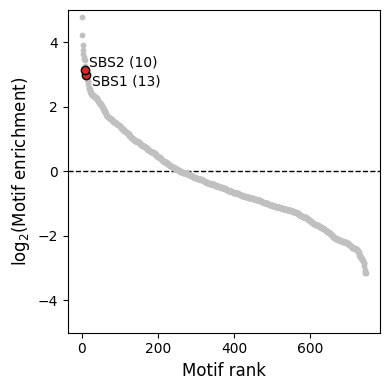

In [5]:
plt.figure(figsize = (4, 4))
plt.scatter(np.arange(len(enrichment_motifs)), np.log2(enrichment_motifs['Fold_enrichment']), 
            s = 10, color = 'silver')
plt.scatter(enrichment_motifs[enrichment_motifs['Motif_name'] == 'ZFP143_SBS1_denovo_motifs']['Fold_enrichment'].index[0], 
            np.log2(enrichment_motifs[enrichment_motifs['Motif_name'] == 'ZFP143_SBS1_denovo_motifs']['Fold_enrichment'].values[0]), 
            edgecolor = 'k', color = 'C3')
plt.scatter(enrichment_motifs[enrichment_motifs['Motif_name'] == 'ZFP143_SBS2_denovo_motifs']['Fold_enrichment'].index[0], 
            np.log2(enrichment_motifs[enrichment_motifs['Motif_name'] == 'ZFP143_SBS2_denovo_motifs']['Fold_enrichment'].values[0]), 
            edgecolor = 'k', color = 'C3')
plt.text(x = 19, y = 3.6, s = 'SBS2 (10)', va = 'top', ha = 'left', linespacing = 1, fontsize = 10)
plt.text(x = 26, y = 3, s = 'SBS1 (13)', va = 'top', ha = 'left', linespacing = 1, fontsize = 10)
plt.axhline(0, ls = '--', lw = 1, color = 'k', zorder = 0)
plt.xlabel('Motif rank', fontsize = 12)
plt.ylabel('log$_2$(Motif enrichment)', fontsize = 12)
plt.ylim((-5, 5))
plt.tight_layout()
plt.show()

### Overlap between our and public ZFP143 ChIP-seq in mESC

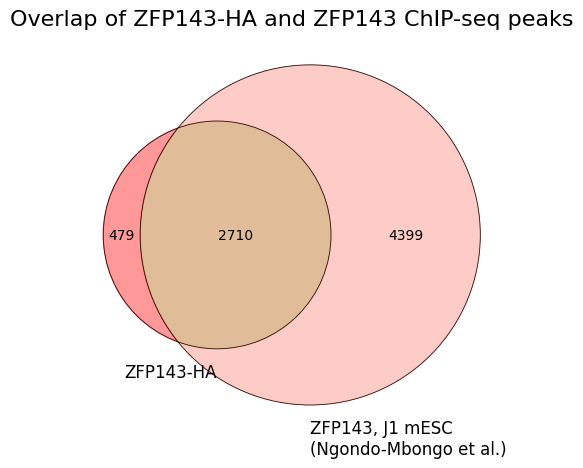

In [6]:
plt.title('Overlap of ZFP143-HA and ZFP143 ChIP-seq peaks', fontsize = 16)
v = venn2([479, 4399, 2710], ('ZFP143-HA', 'ZFP143, J1 mESC\n(Ngondo-Mbongo et al.)'))
c = venn2_circles([479, 4399, 2710], lw = 0.5)
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('01').set_color('salmon')

plt.tight_layout()
plt.show()

### Chromatin states of our and public ZFP143 ChIP-seq in mESC

In [7]:
chromhmm = pd.read_csv('./annotations/chromhmm_peak_annotation.txt', sep = '\t')
chromhmm['ZFP143'] = chromhmm['ZFP143']/sum(chromhmm['ZFP143'])
zfp143_loc = list(chromhmm['ZFP143'].values)
locations = pd.DataFrame({'Feature': [x.split('_')[1] for x in chromhmm['State']]})
locations['ZFP143'] = zfp143_loc
locations = locations.sort_values(['ZFP143'], ascending = 0)
locations

,Feature,ZFP143
6,ActivePromoter,0.655414
7,StrongEnhancer,0.098136
3,Enhancer,0.088981
1,Intergenic,0.047917
5,BivalentChromatin,0.034225
0,Insulator,0.016797
4,RepressedChromatin,0.015214
10,WeakEnhancer,0.012192
8,TranscriptionTransition,0.010698
9,TranscriptionElongation,0.010265


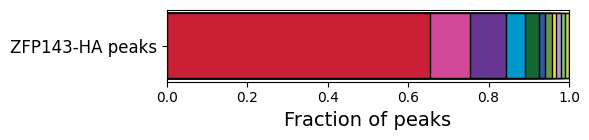

In [11]:
colors = ['#CC2036', '#D24999', '#673692', '#0198CD', '#146635', '#3853A4', '#649941', '#F5EB0F', '#B79AC8', '#77C383', '#CACB65', '#FDF9CC'][::-1]

plt.figure(figsize = (6, 1.5))

### ZFP143-HA peaks
values_to_plot = []
for i in range(0, len(locations)):
    values_to_plot.append(sum(locations['ZFP143'].values[:i+1]))
values_to_plot = values_to_plot[::-1]

for i in range(0, len(values_to_plot)):
    plt.barh(0, width = values_to_plot[i], color = colors[i], edgecolor = 'k')
    
plt.xlim((0, 1))
plt.xlabel('Fraction of peaks', fontsize = 14)
plt.yticks([0], ['ZFP143-HA peaks'], fontsize = 12)

plt.tight_layout()
plt.show()

### Overlap between ZFP143 and CTCF ChIP-seq peaks

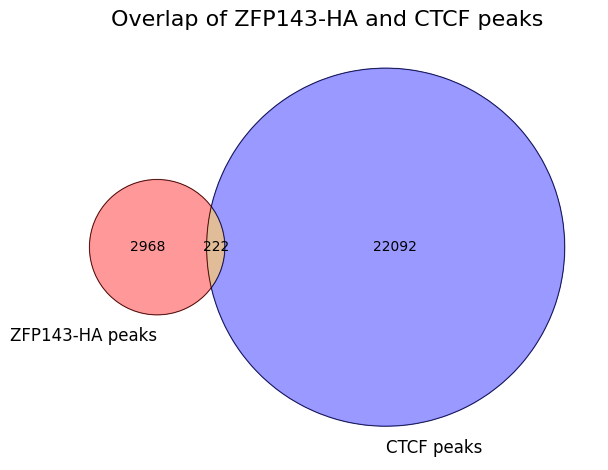

In [12]:
plt.title('Overlap of ZFP143-HA and CTCF peaks', fontsize = 16)
v = venn2([2968, 22092, 222], ('ZFP143-HA peaks', 'CTCF peaks'))
c = venn2_circles([2968, 22092, 222], lw = 0.5)
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('01').set_color('blue')

plt.tight_layout()
plt.show()